<a href="https://colab.research.google.com/github/Chung-collab/GREAT-LAB/blob/main/My1st_selfie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This exercise is to take a selfie photo using cv2 in colab and apply pre-trained facial recognition apps to identify human face, and to download the photo.
CV2 Casecade Classifer source codes are extracted from Cascade Classification https://colab.research.google.com/github/computationalcore/introduction-to-opencv/blob/master/notebooks/4-Cascade_classification.ipynb#scrollTo=T2JCR1Z47g9L
Face detection source codes are extracted from Face detection using pre-trained model https://colab.research.google.com/github/dortmans/ml_notebooks/blob/master/face_detection.ipynb#scrollTo=pSb3BnYX_atl


In [18]:
import imutils
import numpy as np
import cv2 
import common #some useful opencv functions
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [15]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [46]:
photo = take_photo()

<IPython.core.display.Javascript object>

400 300


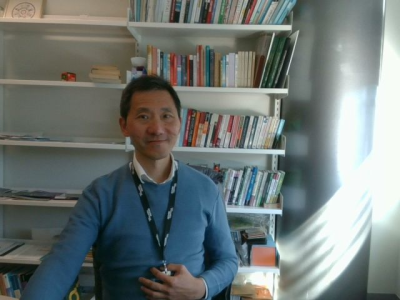

In [47]:
#use cv2.imread to read the photo and rename as selfie = cv2.imread(photo)
selfie = cv2.imread(photo)

# resize it to have a maximum width of 400 pixels
selfie = imutils.resize(selfie, width=400)
(h, w) = selfie.shape[:2]
print(w,h)
cv2_imshow(selfie)

In [37]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg \
    -O test.jpg
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
#!wget --no-check-certificate \
#    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
#    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

--2021-07-01 01:52:09--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 240458 (235K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>] 234.82K  --.-KB/s    in 0.02s   

2021-07-01 01:52:09 (12.6 MB/s) - ‘test.jpg’ saved [240458/240458]

--2021-07-01 01:52:09--  https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [38]:
#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

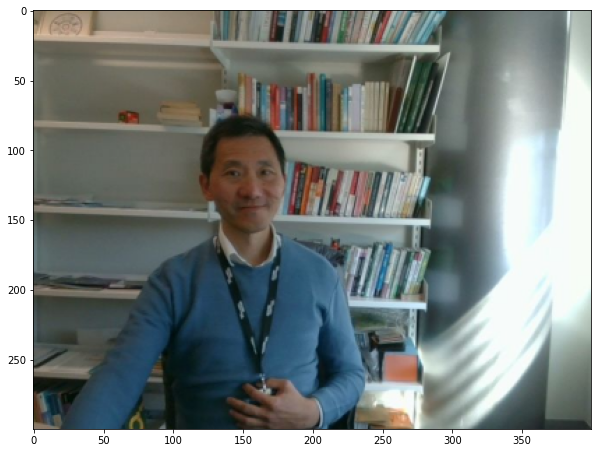

In [48]:
#create a greyscale copy of it to be used 
grey = cv2.cvtColor(selfie, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(selfie, cv2.COLOR_BGR2RGB))

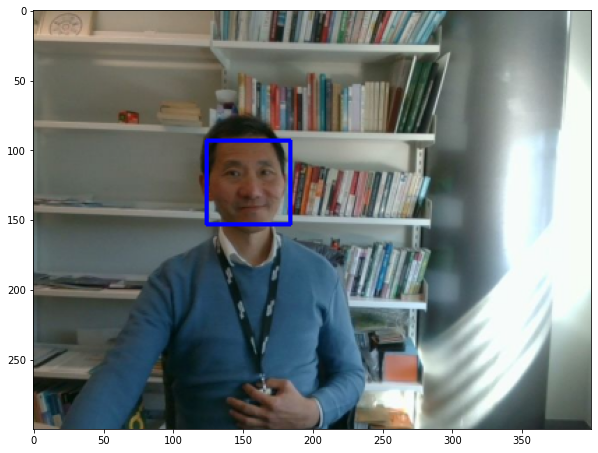

In [49]:
# this is a pre-trained face cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for (x,y,w,h) in faces:
     cv2.rectangle(selfie,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(selfie, cv2.COLOR_BGR2RGB))

In [45]:
cv2.imwrite('selfie.jpg', selfie)
from google.colab import files
files.download('selfie.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

If an auto-selfie machine is preferred, please watch Programming Hero (2021) Take Automatic Selfie Using Python, Youtube, June 23. https://youtu.be/xhG2AeyJXcU